# Data Exploration

Before jumping into applying algorithms, we start from figuring out data by visualization. 

In [1]:
import pandas as pd

df = pd.read_csv("datasets/house/train.csv")
print(df["SalePrice"].describe())
print("Shape = {}".format(df.shape))
print(df.columns)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Shape = (1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bed

First, we get the meaning of each feature. There are 81 features and we can their meaning at [this page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Most of them are about features of each building like size, location, and price, which we want to predict here. 

Let's start from grasping features of target variable, `SalePrice`.

# SalePrice

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%matplotlib inline

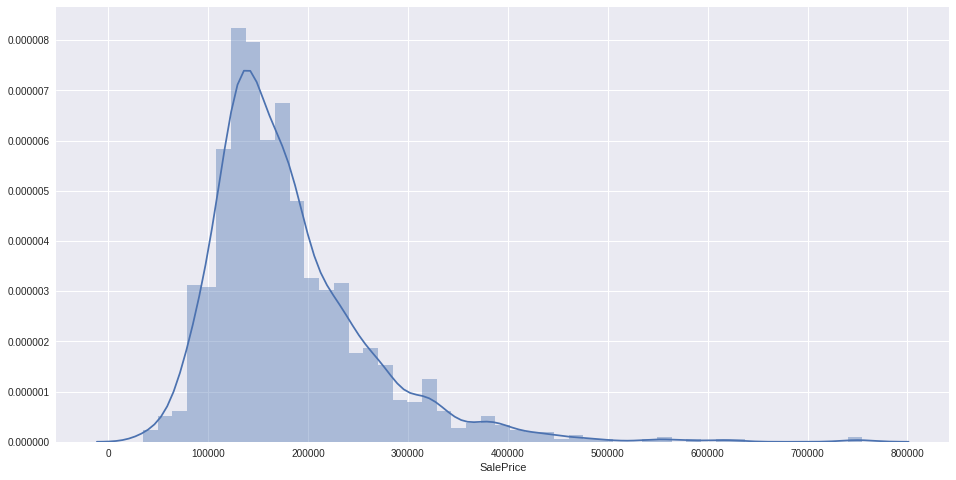

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.distplot(df['SalePrice']);

Looks a little bit skewed. The `SalePrice` is positive number, which is one of the reasons why applying Gaussian distribution is improper. We estimate this quantitatively. 

In [9]:
print("Skewness is %f" % df["SalePrice"].skew())
print("Kurtosis is %f" % df["SalePrice"].kurt()) # if normal, kurtosis is 0

Skewness is 1.882876
Kurtosis is 6.536282


Here is an article [[1]](https://brownmath.com/stat/shape.htm) as to how to use skew and kurtosis. According to the rule of thumbs, skewness more than 3 can be said the distribution is deviated from Gaussian distribution. 

We can also use visualization technique called normal probability plot [[2]](https://en.wikipedia.org/wiki/Normal_probability_plot) to see if the distribution is normal. 

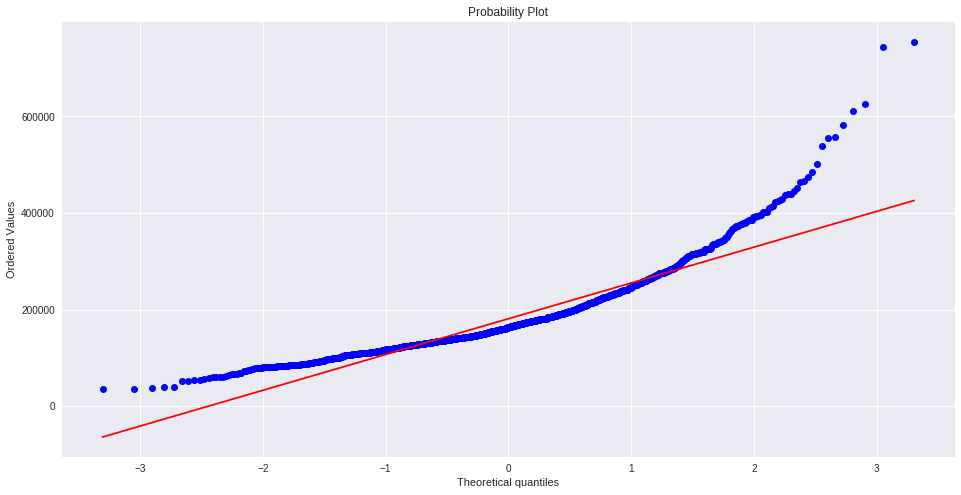

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
res = stats.probplot(df['SalePrice'], plot=plt);

In above figure, red line corresponds to theoretical quantile values of normal distribution, while blue points correspond to sample points. If sample points are distributed according to normal distribution, blue points are on the red line. Blue points seem a little bit deviate from the red line. 

Considering that `SalePrice` takes only positive numbers, Gaussian distribution is not appropriate. 
Let's apply log function.

Skewness is 0.121335
Kurtosis is 0.809532


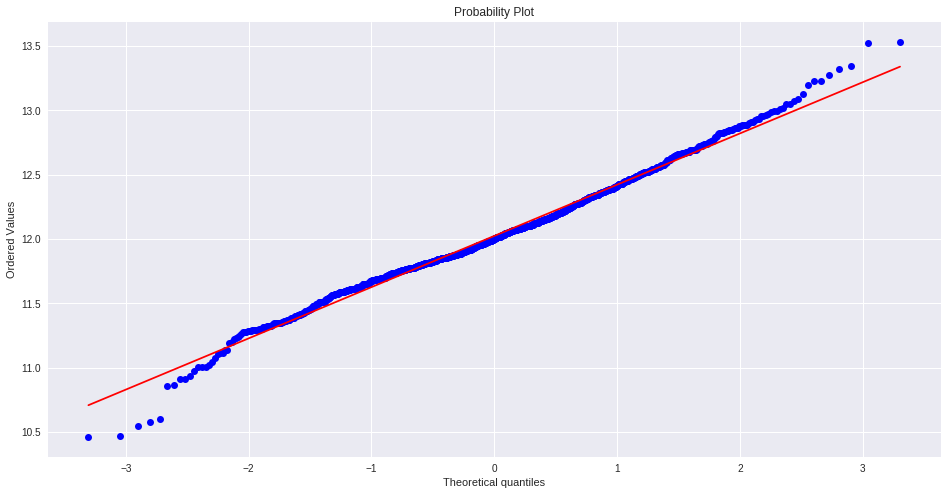

In [11]:
df["LogPrice"] = np.log(df["SalePrice"].values)
print("Skewness is %f" % df["LogPrice"].skew())
print("Kurtosis is %f" % df["LogPrice"].kurt()) # if normal, kurtosis is 0
fig, ax = plt.subplots(figsize=(16, 8))
res = stats.probplot(df['LogPrice'], plot=plt);

There you go!  Price looks much closer to Gaussian distribution.

Next, we consider other features. Most of variables can be classified into one of three categories:
* Numerical
* Categorical
* OrderCategorical: Categorical variable but it has the order, e.g., integer score (bad=1, okay=1, good=2)

In [12]:
numericals = []
categoricals = []
others = []

for col in df.columns:
    dtype = df[col].values.dtype
    if dtype == float and col not in ["SalePrice", "LogPrice"]:
        numericals.append(col)
    elif dtype == 'object':
        categoricals.append(col)
    else:
        others.append(col)

In [13]:
print("Numerical:")
print(numericals)
print("*" * 100)
print("Categorical:")
print(categoricals)
print("*" * 100)
print("Others:")
print(others)

Numerical:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
****************************************************************************************************
Categorical:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
****************************************************************************************************
Others:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsm

In [14]:
pd.set_option('display.max_columns', 100)
df[others].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogPrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


In [15]:
order_categorical = ["MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRenidAdd",
                     "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr",
                     "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold", "YrSold"]
int_numerical = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", 
             "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
             "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "SalePrice"]

# Input Features

When you buy a house, what would you care other than price? Mostly, location, number of rooms and their sizes. And, someone cares about how old it is. 

## Location

In this dataset, we have 
* MSZoning: The general zoning classification
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


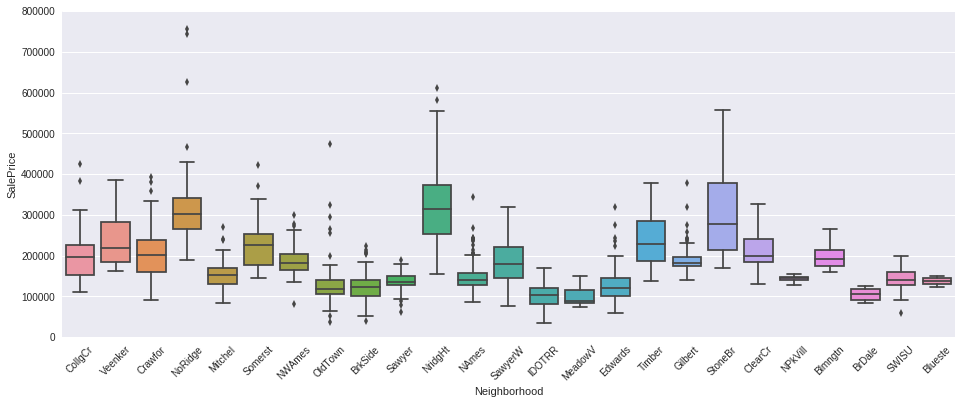

In [16]:
print(df["Neighborhood"].unique())
var = "Neighborhood"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

As we can expect, the price range differs depending on the location. Especially, 'NridgHt', 'StoneBr', and 'NoRidge' seem the most expensive places.

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


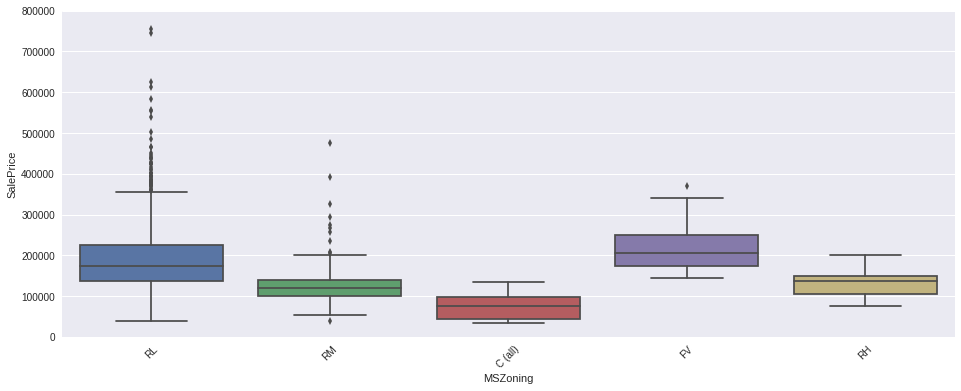

In [17]:
var = "MSZoning"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


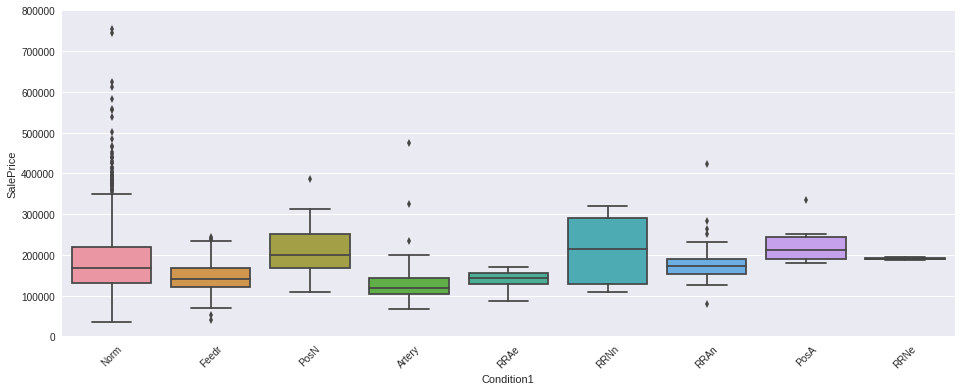

In [18]:
var = "Condition1"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


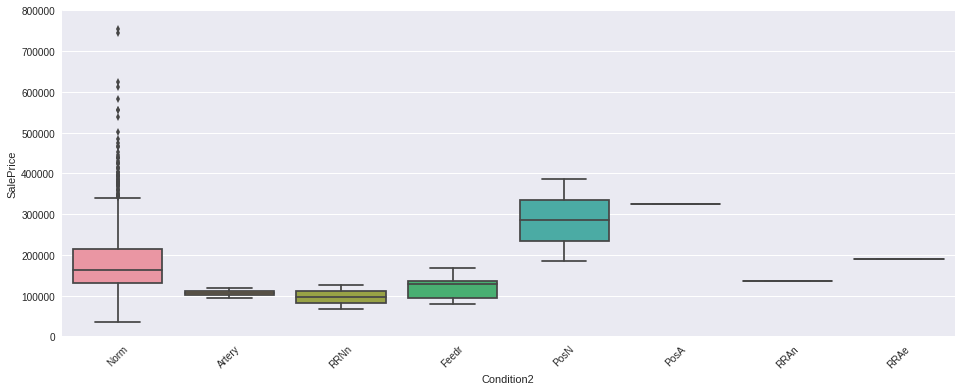

In [19]:
var = "Condition2"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

The other three features appear not to have a significant effect on price compared to `Neighborhood`.

### In summary

'Neighborhood' seems to have the most significant effect on the price distribution as expected. If you live in expensive area, price will go up on the average.

## # of Rooms and Their Size

Overall, most of features in dataset is related to this topic in some way. We pick up several features which may affect its price:

* LotArea: Lot size in square feet
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* BedroomAbvGrd: Number of bedrooms above basement level
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Let's start handling numerical variables.

Correlation:
           SalePrice   LotArea
SalePrice   1.000000  0.263843
LotArea     0.263843  1.000000


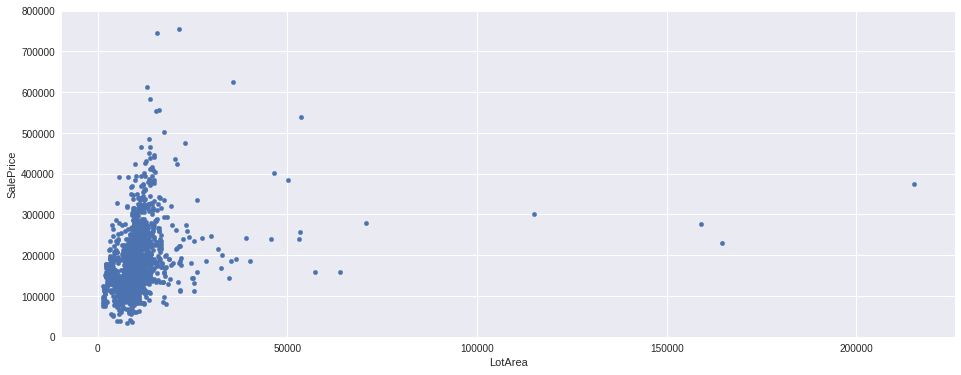

In [20]:
var = 'LotArea'
data = df[["SalePrice", var]]
print("Correlation:")
print(data.corr())
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), figsize=(16, 6));

While we can see the rapid increase of price in the small `LotArea` range, `LotArea` seems to have only small positive linear correlation overall. That might be because a house on huge lot is more likely to locate at country side. 

Correlation:
             SalePrice  TotalBsmtSF
SalePrice     1.000000     0.609681
TotalBsmtSF   0.609681     1.000000


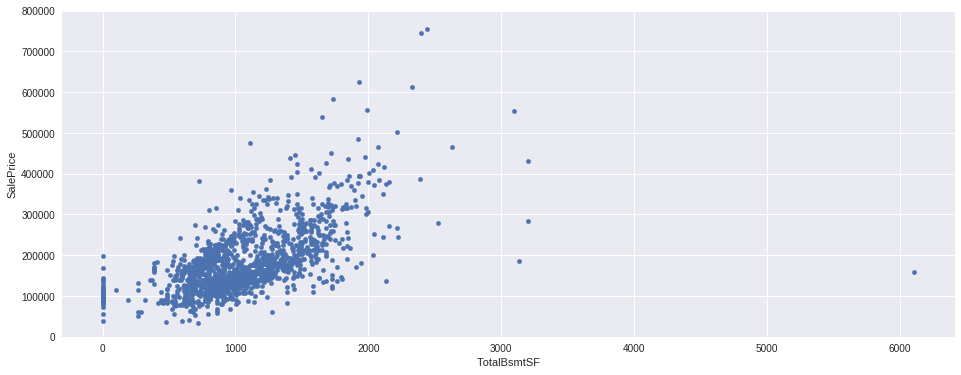

In [21]:
var = 'TotalBsmtSF'
data = df[["SalePrice", var]]
print("Correlation:")
print(data.loc[data[var] > 0].corr())
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), figsize=(16, 6));

Correlation:
           SalePrice  1stFlrSF
SalePrice   1.000000  0.605852
1stFlrSF    0.605852  1.000000


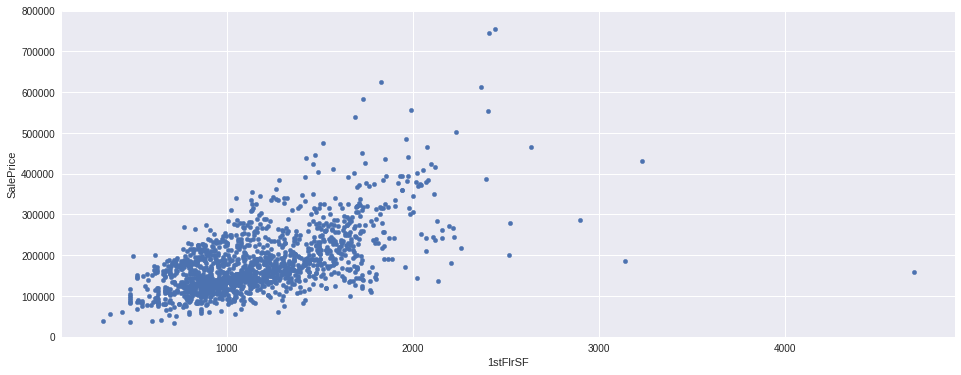

In [22]:
var = '1stFlrSF'
data = df[["SalePrice", var]]
print("Correlation:")
print(data.corr())
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), figsize=(16, 6));

Correlation:
           SalePrice  2ndFlrSF
SalePrice   1.000000  0.673305
2ndFlrSF    0.673305  1.000000


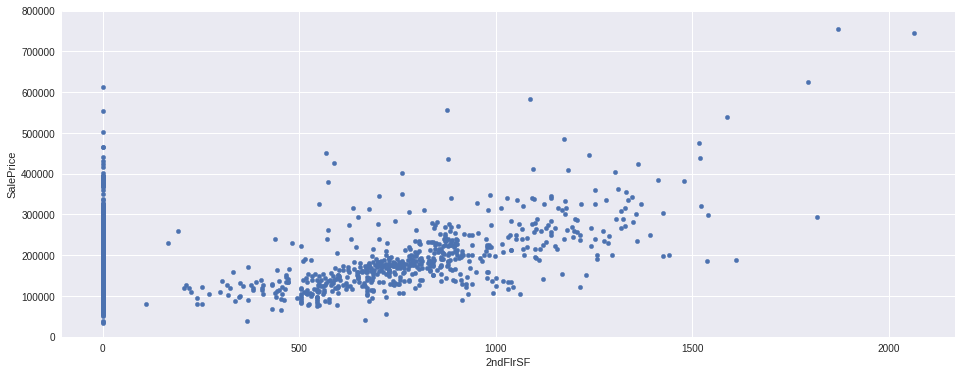

In [23]:
var = '2ndFlrSF'
data = df[["SalePrice", var]]
print("Correlation:")
print(data.loc[data[var] > 0].corr())
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), figsize=(16, 6));

We see a lot of samples at 0 for 'TotalBsmtSF' and '2ndFlrSF'. That is simply because some houses do not have basement or second floor. For all of three variables, linear correlation with price exists.

Next, we handle categorical variables.

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


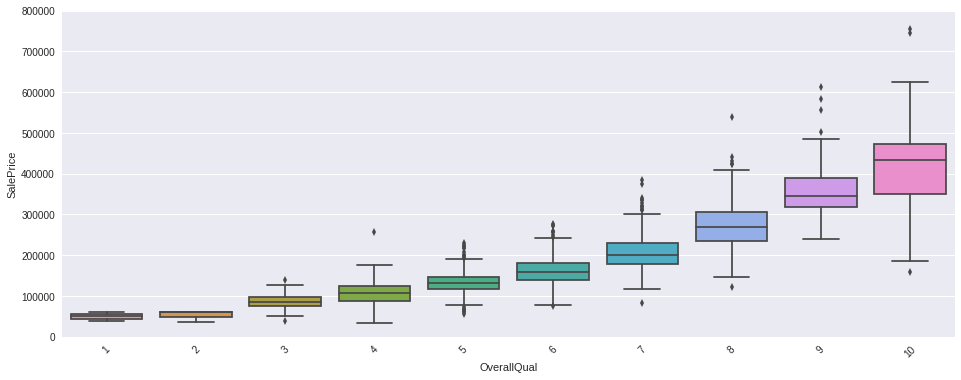

In [24]:
var = "OverallQual"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


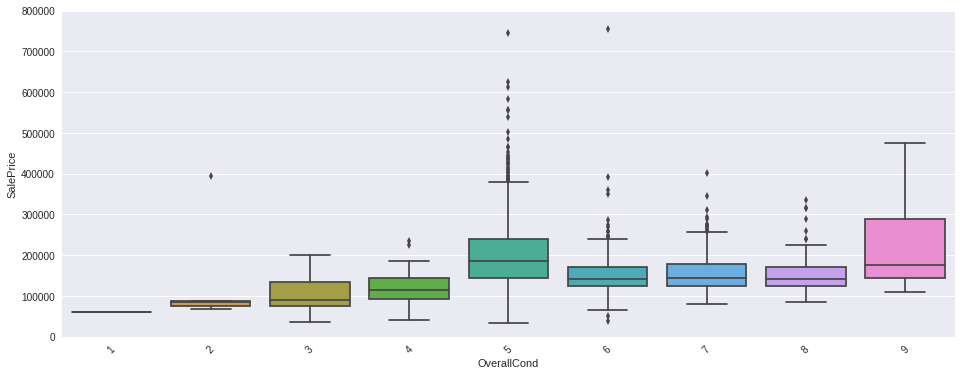

In [25]:
var = "OverallCond"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

`OverallQual` and `OverallCond` are scores of quality and condition, respectively. For both cases, price goes up as high scores are achieved. Especially, `OverallQual` shows the larger slope of linear relation, which indicates the quality matters.

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


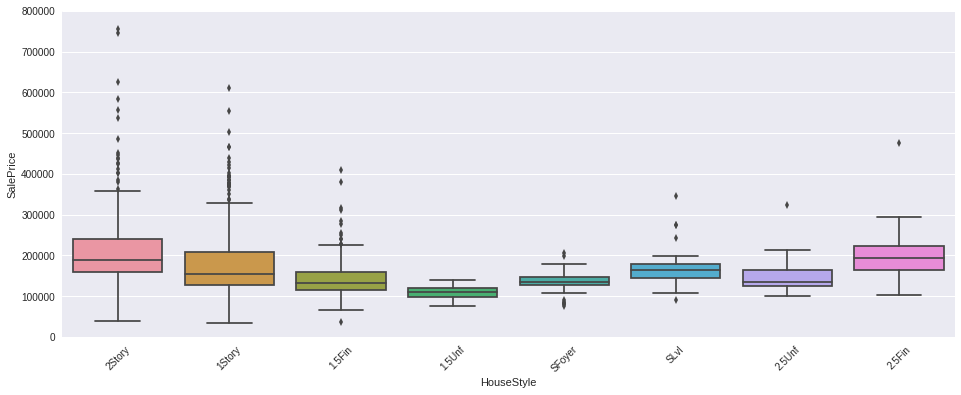

In [26]:
var = "HouseStyle"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

Hmmm..., the house styles seems not to matter so much.

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


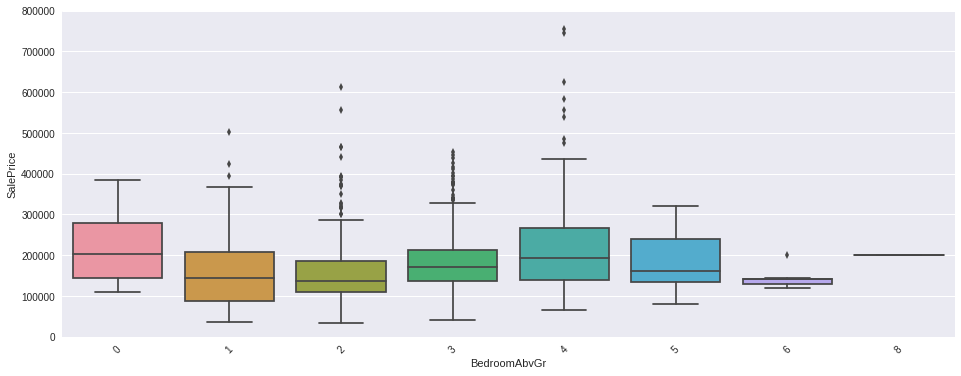

In [27]:
var = "BedroomAbvGr"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


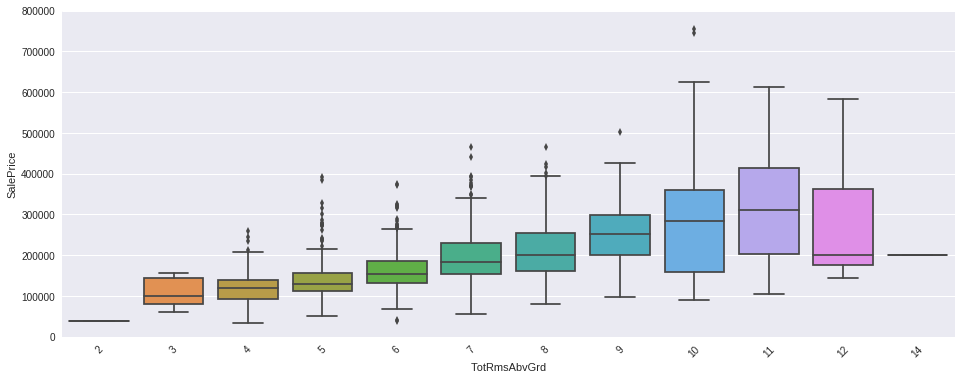

In [28]:
var = "TotRmsAbvGrd"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(16, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

`TotRmsAbvGrd` shows that the more rooms, the more expensive. On the other hand, the number of bedrooms do not have an effect on price so much.

### In summary

Generally speaking, larger house with more rooms is more likely to get expensive.

##  Year

We consider how old houses are. Feature related to this topics are the following two features:
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


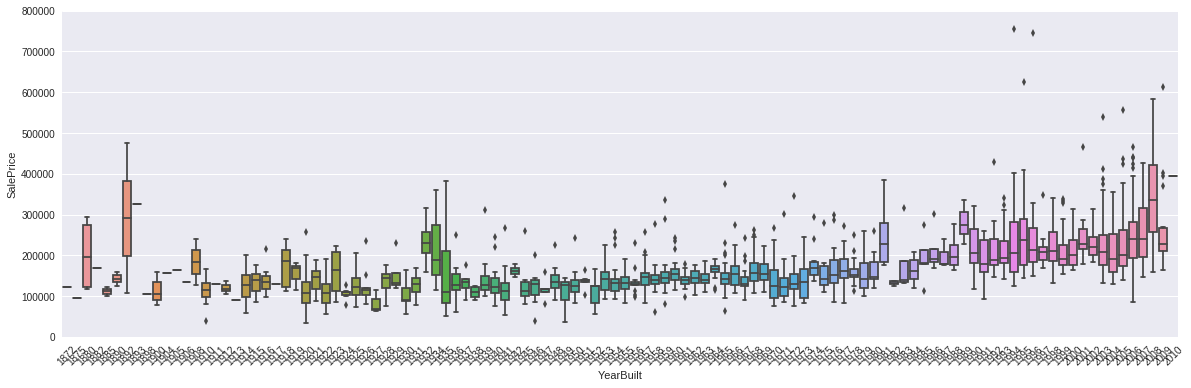

In [29]:
var = "YearBuilt"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(20, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

/home/tomoaki/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


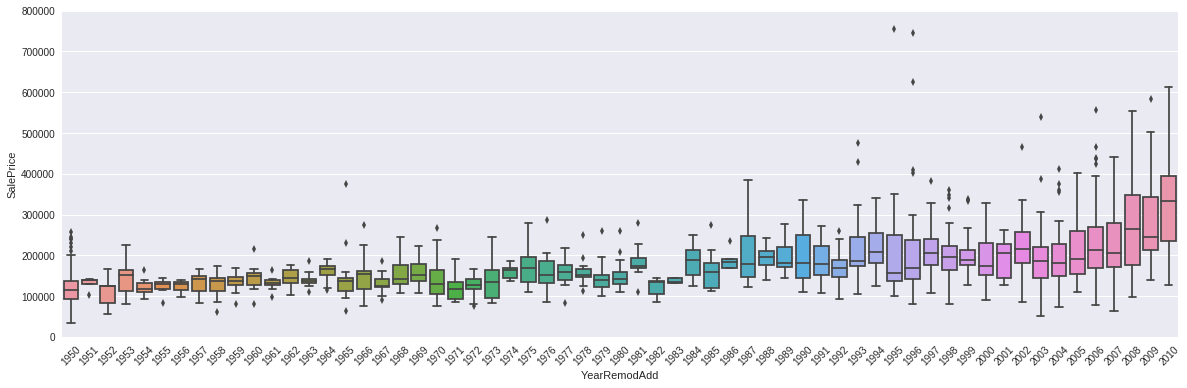

In [30]:
var = "YearRemodAdd"
data = df[["SalePrice", var]]
fig, ax = plt.subplots(figsize=(20, 6))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

### In summary

Both seem to have positive linear correlation. This simply comes from the fact that the newer is more expensive.


When writing this part, I referred to this blog post [[3]](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook)

## References
* [1] [Measures of Shape: Skewness and Kurtosis](https://brownmath.com/stat/shape.htm)
* [2] [Normal probability plot](https://en.wikipedia.org/wiki/Normal_probability_plot)
* [3] [COMPREHENSIVE DATA EXPLORATION WITH PYTHON](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook)

-------

# Missing Data
Next, we work on handling missing values. Before jumping into building algorithms, we need to identify the mechanism behind missing data.

##  # Missing Data Mechanism
Basically, missing data can be classified into three categories: Missing Completely at Random (MCAR), Missing at Random (MAR), and Missing Not at Random (MNAR).
Let's dig into their definitions.

### - Missing Completely at Random (MCAR)
There is no systematic difference between observed and missing data. For example, missing data exists in blood pressure variable because a machine to measure it breaks down for a while. 

### - Missing at Random (MAR)
Any systematic difference between observed and missing data can be explained by observed data. For example, missing blood pressure data may be distributed with lower mean Gaussian distribution. This happens because young people may be likely not to take tests regularly.

### - Missing Not at Random (MNAR)
Even after considering observed data, the systematic difference is not fully explained. For example, people getting high income may hesitate to fill their income at questionnaire. 

Roughly speaking, MCAR is dealt with simple statistics like mean or median while MAR is handled by predictive models regressed on observed data. MNAR is generally more difficult to be dealt with. There is no simple answer as to how to deal with this case. You need to analyze more precisely for each case. 

You can see the definition at the paper [[1]](https://www.bmj.com/content/338/bmj.b2393). There is also an interesting paper in the dialog form claryfing the difference between MCAR and MAR [[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4121561/). Here is tips as to how to diagnose missing mechanisms at the blog post [[3]](https://www.theanalysisfactor.com/missing-data-mechanism/).


## # Algorithms
We introduce some popular algorithms handling missing data.

## Deletion
Dropping missing case is one of the simplest way to deal with missing data. These methods, however, often end up introducing bias in many practical situations.
### - Listwise
Assumption: MCAR
Removes an instance if it contains missing values. 

### - Pairwise
Assumption: MCAR
Keep only cases containing interest variables and remove the others. Compared to listwise deletion, pairwise deletion may contain instances having missing data on some variables.

### - Dropping Variables
Assumption: Dropped variables do not have any predictive power.
Drop variables with missing values.


## Imputation
Next, we consider imputing missing values instead of simply dropping.
### - Mean, Median and Mode
Assumption: MCAR
Replace missing values with mean, median or mode. They are one of the most simple imputations and implemented in scikit-learn.

### - Multiple Imputation
Assumption: MAR
Imputation is executed in the following:

1. Impute missing values with basic methods like mean or median
2. Set back imputed values to massing values for each feature to impute
3. The feature is regressed on the other variables, which may or may not include all of other variables
4. Replace missing values with predicted values
5. Repeat 2-4 for each feature
6. Repeat process from 2-5 for the number of cycles. Then, store the last values as an imputed dataset

This imputation is know to work well for small number of features and instance datasets.
You can check the precise algorithms at the paper [[4]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/pdf/nihms267760.pdf)


### - K Nearest Neighbor (KNN)
Assumption: MAR

The efficiency is $O(N^2)$.
You can use [LSH](https://www.slaney.org/malcolm/yahoo/Slaney2008-LSHTutorial.pdf) instead for large scale datasets.
Note that this algorithm requires standardization beforehand. 

### - Linear Regression(Logistic Regression)
Assumption: MAR

Regress missing features on the other variables.

### - Create a New Label for Missing Values
Assumption: Categorical

Just you can create a new label something like `NaN` and treat it as a new label.

## # Note
Among algorithms introduced above, KNN and multiple imputation are popular methods and easy to use.
There is a nice blog post [[5]](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) about handling missing data. You should check it out.

## # Reference
* [1] [Multiple imputation for missing data in epidemiological and clinical research: potential and pitfalls](https://www.bmj.com/content/338/bmj.b2393)
* [2] [What is the difference between missing completely at random and missing at random?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4121561/)
* [3] [How to Diagnose the Missing Data Mechanism](https://www.theanalysisfactor.com/missing-data-mechanism/)
* [4] [Multiple Imputation by Chained Equations: What is it and how does it work?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/pdf/nihms267760.pdf)
* [5] [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)


## # Practice
Let's handle actual missing data.

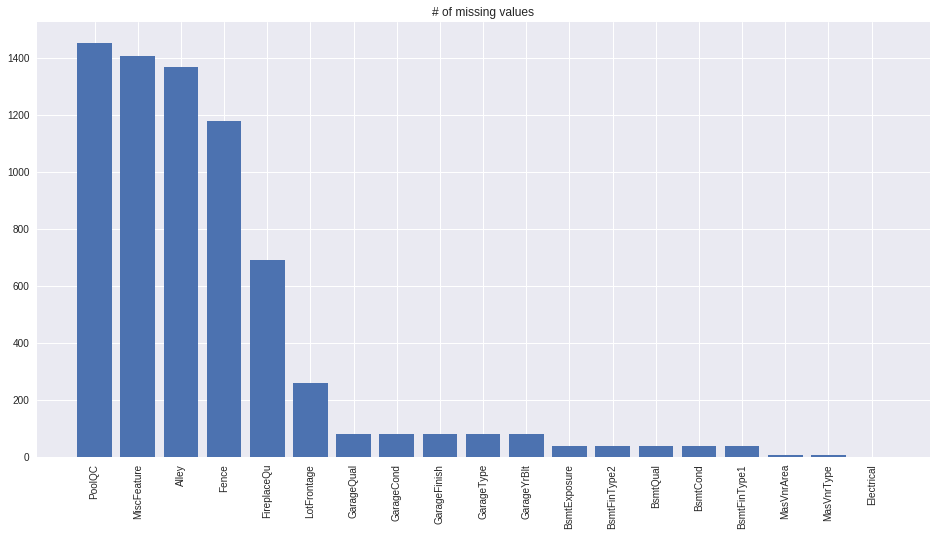

In [31]:
missing = df.isnull().sum(axis=0).sort_values(ascending=False)
missing = missing.loc[missing > 0]
N = missing.shape[0]
x = np.arange(N)
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("# of missing values")
plt.bar(x, missing);
plt.xticks(x, missing.index, rotation=90);

One of the reasons why `PoolQC` has a lot of missing values can be guessed that most of house do not have pool. This column, however, may be useful to determine if the house if it is high-end with pool. We just create a new label called `NaN` to deal with missing value. We apply the same technique for other categorical variables.

In [32]:
for col in missing.index:
    print(col, ", dtype={}".format(df[col].dtype))

PoolQC , dtype=object
MiscFeature , dtype=object
Alley , dtype=object
Fence , dtype=object
FireplaceQu , dtype=object
LotFrontage , dtype=float64
GarageQual , dtype=object
GarageCond , dtype=object
GarageFinish , dtype=object
GarageType , dtype=object
GarageYrBlt , dtype=float64
BsmtExposure , dtype=object
BsmtFinType2 , dtype=object
BsmtQual , dtype=object
BsmtCond , dtype=object
BsmtFinType1 , dtype=object
MasVnrArea , dtype=float64
MasVnrType , dtype=object
Electrical , dtype=object


In [33]:
numericals_missing = []
categoricals_missing = []
for col in missing.index:
    if df[col].dtype == float:
        numericals_missing.append(col)
    else:
        categoricals_missing.append(col)
print("Numerical:")
print(numericals_missing)
print("Categorical:")
print(categoricals_missing)

Numerical:
['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
Categorical:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageType', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']


In [34]:
for col in categoricals_missing:
    df[col] = df[col].fillna("NaN")

In [35]:
from fancyimpute import MICE

df[numericals] = MICE().complete(df[numericals].values)

/home/tomoaki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[MICE] Completing matrix with shape (1460, 3)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.001
[MICE] Starting imputation round 3/110, elapsed time 0.002
[MICE] Starting imputation round 4/110, elapsed time 0.003
[MICE] Starting imputation round 5/110, elapsed time 0.004
[MICE] Starting imputation round 6/110, elapsed time 0.004
[MICE] Starting imputation round 7/110, elapsed time 0.005
[MICE] Starting imputation round 8/110, elapsed time 0.006
[MICE] Starting imputation round 9/110, elapsed time 0.007
[MICE] Starting imputation round 10/110, elapsed time 0.007
[MICE] Starting imputation round 11/110, elapsed time 0.008
[MICE] Starting imputation round 12/110, elapsed time 0.009
[MICE] Starting imputation round 13/110, elapsed time 0.010
[MICE] Starting imputation round 14/110, elapsed time 0.010
[MICE] Starting imputation round 15/110, elapsed time 0.011
[MICE] Starting imputation round 16/110, elapsed time 0.012
[MI